(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)


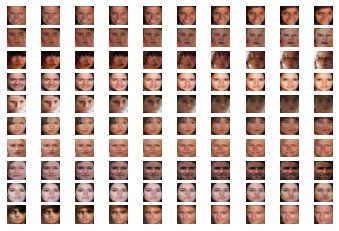

In [1]:
# example of interpolating between generated faces
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from numpy import asarray
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from numpy import arccos
from numpy import clip
from numpy import dot
from numpy import sin
from numpy import linspace
from numpy.linalg import norm
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

# spherical linear interpolation (slerp)
def slerp(val, low, high):
    omega = arccos(clip(dot(low/norm(low), high/norm(high)), -1, 1))
    so = sin(omega)
    if so == 0:
        # L'Hopital's rule/LERP
        return (1.0-val) * low + val * high
    return sin((1.0-val)*omega) / so * low + sin(val*omega) / so * high

# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = slerp(ratio, p1, p2)
        vectors.append(v)
    return asarray(vectors)

# create a plot of generated images
def plot_generated(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :])
    pyplot.show()

# load model
model = load_model('generator_model_100.h5')
# generate points in latent space
n = 20
pts = generate_latent_points(200, n)
# interpolate pairs
results = None
for i in range(0, n, 2):
    # interpolate points in latent space
    interpolated = interpolate_points(pts[i], pts[i+1])
    print(interpolated.shape)
    # generate images
    X = model.predict(interpolated)
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    if results is None:
        results = X
    else:
        results = vstack((results, X))
# plot the result
plot_generated(results, 10)